In [1]:
x=

SyntaxError: invalid syntax (Temp/ipykernel_54612/2285918444.py, line 1)

In [3]:
import pandas as pd
import numpy as np

import pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [4]:
df=pd.read_csv('data/salaries_data.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,SE,FT,Data Engineer,140250,USD,140250,US,100,US,M
1,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
2,2021,MI,FT,BI Data Analyst,100000,USD,100000,US,100,US,M
3,2021,MI,CT,ML Engineer,270000,USD,270000,US,100,US,L
4,2021,MI,FT,Data Engineer,22000,EUR,26005,RO,0,US,L


In [5]:
df.shape

(500, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           500 non-null    int64 
 1   experience_level    500 non-null    object
 2   employment_type     500 non-null    object
 3   job_title           500 non-null    object
 4   salary              500 non-null    int64 
 5   salary_currency     500 non-null    object
 6   salary_in_usd       500 non-null    int64 
 7   employee_residence  500 non-null    object
 8   remote_ratio        500 non-null    int64 
 9   company_location    500 non-null    object
 10  company_size        500 non-null    object
dtypes: int64(4), object(7)
memory usage: 43.1+ KB


In [7]:
# No null values --> OK

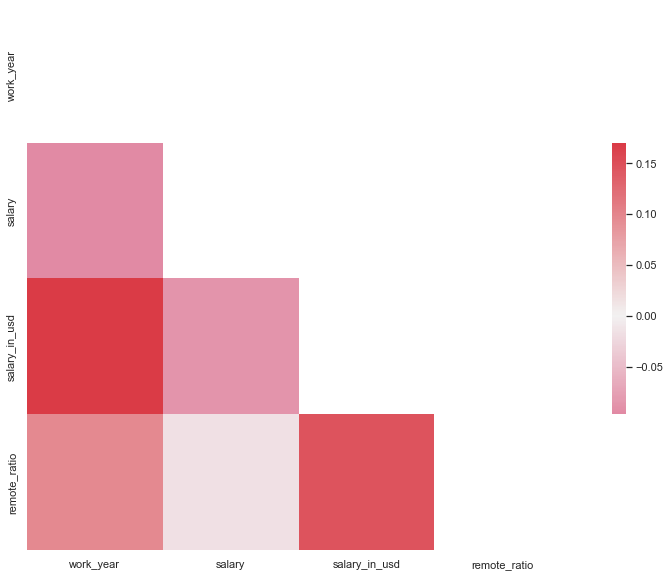

In [8]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(df.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(df.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0,
          cbar_kws={'shrink': 0.5});

In [9]:
df = df.drop('employee_residence', axis=1)

In [10]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [11]:
def unique_values():
    for e in df.columns:
        print(df[e].unique())  

In [12]:
df.job_title.value_counts()

Data Scientist                              121
Data Engineer                               111
Data Analyst                                 81
Machine Learning Engineer                    31
Research Scientist                           12
Data Science Manager                         12
Data Architect                                8
Machine Learning Scientist                    7
Data Analytics Manager                        7
Big Data Engineer                             7
Director of Data Science                      7
ML Engineer                                   6
Lead Data Engineer                            6
Principal Data Scientist                      6
Applied Data Scientist                        5
Data Engineering Manager                      5
Data Science Consultant                       5
AI Scientist                                  5
BI Data Analyst                               5
Head of Data                                  4
Business Data Analyst                   

In [13]:
unique_values()

[2022 2021 2020]
['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['Data Engineer' 'BI Data Analyst' 'ML Engineer'
 'Machine Learning Scientist' 'Data Scientist' 'Data Analyst'
 'Machine Learning Engineer' 'Principal Data Scientist'
 'Data Engineering Manager' 'Data Analytics Manager' 'Big Data Engineer'
 'Research Scientist' 'Machine Learning Developer'
 'Computer Vision Engineer' 'AI Scientist' 'Machine Learning Manager'
 'Lead Data Scientist' 'Director of Data Science'
 '3D Computer Vision Researcher' 'Data Specialist'
 'Applied Data Scientist' 'Data Science Engineer' 'Head of Data'
 'Analytics Engineer' 'ETL Developer' 'Marketing Data Analyst'
 'Data Architect' 'Data Science Consultant' 'Principal Data Analyst'
 'Head of Data Science' 'Lead Data Engineer' 'Data Science Manager'
 'Applied Machine Learning Scientist' 'Lead Data Analyst'
 'Cloud Data Engineer' 'Lead Machine Learning Engineer'
 'Machine Learning Infrastructure Engineer' 'Big Data Architect'
 'Product Data Analyst' 'Business

In [14]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [15]:
experience_level={'SE':0, 'MI':1,  'EN':2, 'EX':3}

employment_type={'FT':0, 'CT':1,  'FL':2, 'PT':3}


salary_currency={'USD':0, 'EUR':1, 'INR':2, 'GBP':3, 'JPY':4, 'CAD':5, 'MXN':6, 'CHF':7, 'CLP':8, 'TRY':9, 'AUD':10, 'BRL':11,
 'HUF':12, 'PLN':13, 'SGD':14}


company_location={'US':0, 'FR':1, 'GR':2, 'LU':3, 'SI':4, 'DE':5, 'IN':6, 'GB':7, 'PK':8, 'MD':9, 'JP':10, 'CA':11, 'AS':12, 'IE':13,
 'AE':14, 'MX':15, 'VN':16, 'BE':17, 'KE':18, 'ES':19, 'CH':20, 'CL':21, 'CN':22, 'DK':23, 'TR':24, 'NZ':25, 'PL':26, 'UA':27,
 'AU':28, 'NG':29, 'EE':30, 'CZ':31, 'AT':32, 'BR':33, 'DZ':34, 'IR':35, 'NL':36, 'HU':37, 'PT':38, 'HN':39, 'MT':40, 'RO':41,
 'SG':42}

company_size={'M':0, 'L':1, 'S':2}


job_title={'Data Engineer':2, 'BI Data Analyst':3, 'ML Engineer':3,
 'Machine Learning Scientist':8, 'Data Scientist':1, 'Data Analyst':0,
 'Machine Learning Engineer':4, 'Principal Data Scientist':3,
 'Data Engineering Manager':3, 'Data Analytics Manager':9, 'Big Data Engineer':10,
 'Research Scientist':5, 'Machine Learning Developer':3,
 'Computer Vision Engineer':3, 'AI Scientist':3, 'Machine Learning Manager':3,
 'Lead Data Scientist':3, 'Director of Data Science':11,
 '3D Computer Vision Researcher':3, 'Data Specialist':3,
 'Applied Data Scientist':3, 'Data Science Engineer':3, 'Head of Data':3,
 'Analytics Engineer':3, 'ETL Developer':3, 'Marketing Data Analyst':3,
 'Data Architect':7, 'Data Science Consultant':3, 'Principal Data Analyst':3,
 'Head of Data Science':3, 'Lead Data Engineer':3, 'Data Science Manager':6,
 'Applied Machine Learning Scientist':3, 'Lead Data Analyst':3,
 'Cloud Data Engineer':3, 'Lead Machine Learning Engineer':3,
 'Machine Learning Infrastructure Engineer':3, 'Big Data Architect':3,
 'Product Data Analyst':3, 'Business Data Analyst':3,
 'Director of Data Engineering':3, 'Data Analytics Lead':3,
 'Financial Data Analyst':3, 'Finance Data Analyst':3,
 'Head of Machine Learning':3, 'Staff Data Scientist':3,
 'Data Analytics Engineer':3, 'Computer Vision Software Engineer':3}



In [16]:
def label(s, dic):
    return dic[s]

In [17]:
df.experience_level=df.experience_level.apply(lambda x: label(x, experience_level))

df.employment_type=df.employment_type.apply(lambda x: label(x, employment_type))

df.salary_currency=df.salary_currency.apply(lambda x: label(x, salary_currency))

df.company_location=df.company_location.apply(lambda x: label(x, company_location))

df.company_size=df.company_size.apply(lambda x: label(x, company_size))

df.job_title=df.job_title.apply(lambda x: label(x, job_title))

df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_location,company_size
0,2022,0,0,2,140250,0,140250,100,0,0
1,2022,0,0,2,135000,0,135000,100,0,0
2,2021,1,0,3,100000,0,100000,100,0,0
3,2021,1,1,3,270000,0,270000,100,0,1
4,2021,1,0,2,22000,1,26005,0,0,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         500 non-null    int64
 1   experience_level  500 non-null    int64
 2   employment_type   500 non-null    int64
 3   job_title         500 non-null    int64
 4   salary            500 non-null    int64
 5   salary_currency   500 non-null    int64
 6   salary_in_usd     500 non-null    int64
 7   remote_ratio      500 non-null    int64
 8   company_location  500 non-null    int64
 9   company_size      500 non-null    int64
dtypes: int64(10)
memory usage: 39.2 KB


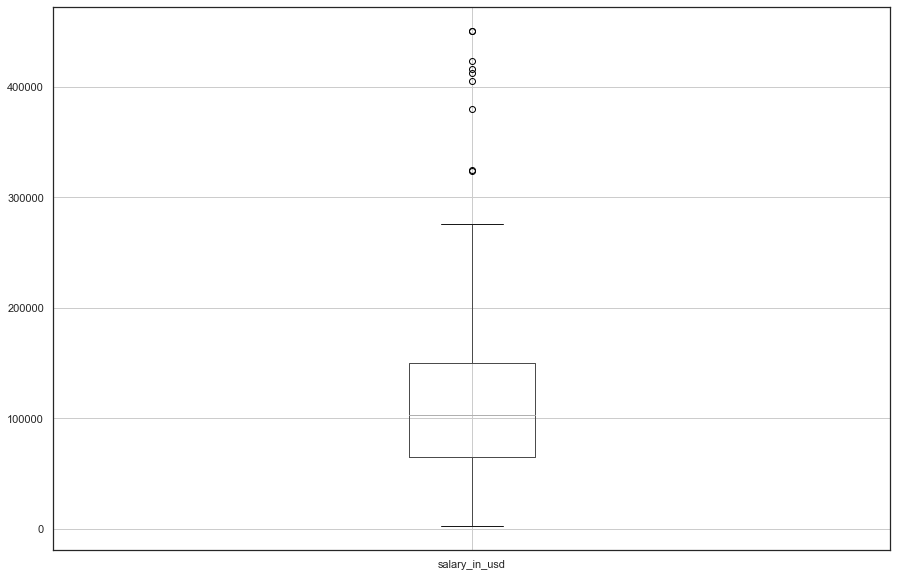

In [19]:
plt.figure(figsize=(15, 10))

df.boxplot(column=['salary_in_usd']);

In [20]:
df = df[df['salary_in_usd']<285000]

In [21]:
df.shape

(491, 10)

In [22]:
scaler=StandardScaler()

In [23]:
X=df.drop('salary_in_usd', axis=1)

y=df.salary_in_usd

In [24]:
X[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'remote_ratio', 'company_location',
       'company_size']]=scaler.fit_transform(X[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'remote_ratio', 'company_location',
       'company_size']])

In [25]:
X.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
0,0.853064,-0.866215,-0.167897,-0.170714,-0.117578,-0.475026,0.701169,-0.564365,-0.814880
1,0.853064,-0.866215,-0.167897,-0.170714,-0.120780,-0.475026,0.701169,-0.564365,-0.814880
2,-0.621776,0.348961,-0.167897,0.263589,-0.142125,-0.475026,0.701169,-0.564365,-0.814880
3,-0.621776,0.348961,2.187459,0.263589,-0.038447,-0.475026,0.701169,-0.564365,0.608985
4,-0.621776,0.348961,-0.167897,-0.170714,-0.189695,0.030913,-1.766744,-0.564365,0.608985


In [26]:
X.shape, y.shape

((491, 9), (491,))

TRAIN TEST SPLIT

In [27]:
from sklearn.model_selection import train_test_split as tts

In [28]:
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.8, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 9), (99, 9), (392,), (99,))

MODELO REGRESIÓN LINEAL

In [29]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet



# se inician los modelos
linreg=LinReg()
lasso=Lasso()
ridge=Ridge()
elastic=ElasticNet()

In [30]:
linreg.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
elastic.fit(X_train, y_train)

ElasticNet()

MODELO REGRESIÓN SVR

In [31]:
from sklearn.svm import SVR  # support vector regressor

svr=SVR()

In [32]:
svr.fit(X_train, y_train)

SVR()

MODELO REGRESIÓN RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR

rfr=RFR()
etr=ETR()

In [34]:
rfr.fit(X_train, y_train)
etr.fit(X_train, y_train)

ExtraTreeRegressor()

MODELO REGRESIÓN BOOSTING

In [35]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from catboost import CatBoostRegressor as CTR

from lightgbm import LGBMRegressor as LGBMR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()
lgbmr=LGBMR()

In [36]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [37]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [38]:
ctr.fit(X_train, y_train, verbose=0)

In [39]:
lgbmr.fit(X_train, y_train)

LGBMRegressor()

In [40]:
modelos=[linreg, lasso, ridge,elastic,svr,rfr,etr, gbr, xgbr, ctr, lgbmr]

for m in modelos:
    m.fit(X_train, y_train)

Learning rate set to 0.035312
0:	learn: 57151.9810108	total: 1.03ms	remaining: 1.02s
1:	learn: 55848.6776496	total: 1.95ms	remaining: 972ms
2:	learn: 54505.2916322	total: 2.87ms	remaining: 953ms
3:	learn: 53103.0468665	total: 3.5ms	remaining: 871ms
4:	learn: 51968.7319323	total: 4.42ms	remaining: 879ms
5:	learn: 50850.4764203	total: 5.29ms	remaining: 877ms
6:	learn: 49857.4289727	total: 6.19ms	remaining: 878ms
7:	learn: 48829.0402633	total: 7.05ms	remaining: 874ms
8:	learn: 47846.3016965	total: 7.93ms	remaining: 873ms
9:	learn: 46661.5494331	total: 8.75ms	remaining: 866ms
10:	learn: 45465.1879983	total: 9.54ms	remaining: 858ms
11:	learn: 44446.0283318	total: 10.4ms	remaining: 857ms
12:	learn: 43599.1199120	total: 11.2ms	remaining: 851ms
13:	learn: 42612.6853397	total: 12ms	remaining: 846ms
14:	learn: 41810.8970956	total: 12.8ms	remaining: 841ms
15:	learn: 40884.8182758	total: 13.5ms	remaining: 833ms
16:	learn: 39952.8632246	total: 14.3ms	remaining: 828ms
17:	learn: 39024.5820775	total:

191:	learn: 6215.9578721	total: 161ms	remaining: 677ms
192:	learn: 6159.5316472	total: 162ms	remaining: 678ms
193:	learn: 6107.4329371	total: 163ms	remaining: 678ms
194:	learn: 6061.1059395	total: 164ms	remaining: 677ms
195:	learn: 6020.1881070	total: 165ms	remaining: 675ms
196:	learn: 5974.9079795	total: 165ms	remaining: 674ms
197:	learn: 5933.1242709	total: 166ms	remaining: 674ms
198:	learn: 5881.1931671	total: 168ms	remaining: 675ms
199:	learn: 5836.4774299	total: 169ms	remaining: 675ms
200:	learn: 5796.2991921	total: 170ms	remaining: 676ms
201:	learn: 5742.7629559	total: 171ms	remaining: 676ms
202:	learn: 5717.5412049	total: 172ms	remaining: 677ms
203:	learn: 5668.3616194	total: 174ms	remaining: 678ms
204:	learn: 5617.4328062	total: 174ms	remaining: 676ms
205:	learn: 5576.3013818	total: 175ms	remaining: 676ms
206:	learn: 5556.6225355	total: 176ms	remaining: 676ms
207:	learn: 5516.0337786	total: 178ms	remaining: 676ms
208:	learn: 5472.1774920	total: 179ms	remaining: 677ms
209:	learn

441:	learn: 2473.4480275	total: 494ms	remaining: 623ms
442:	learn: 2465.1726091	total: 495ms	remaining: 623ms
443:	learn: 2458.4078865	total: 496ms	remaining: 622ms
444:	learn: 2451.1364686	total: 498ms	remaining: 621ms
445:	learn: 2449.6136015	total: 499ms	remaining: 620ms
446:	learn: 2440.1619687	total: 500ms	remaining: 619ms
447:	learn: 2432.9988379	total: 501ms	remaining: 618ms
448:	learn: 2424.9006116	total: 503ms	remaining: 617ms
449:	learn: 2418.6688810	total: 505ms	remaining: 617ms
450:	learn: 2413.6936677	total: 507ms	remaining: 617ms
451:	learn: 2403.8806673	total: 508ms	remaining: 616ms
452:	learn: 2398.7111608	total: 510ms	remaining: 616ms
453:	learn: 2392.2633291	total: 511ms	remaining: 615ms
454:	learn: 2382.7572967	total: 513ms	remaining: 614ms
455:	learn: 2375.4232412	total: 514ms	remaining: 613ms
456:	learn: 2366.7749349	total: 514ms	remaining: 611ms
457:	learn: 2361.2992574	total: 515ms	remaining: 610ms
458:	learn: 2354.5804309	total: 517ms	remaining: 609ms
459:	learn

655:	learn: 1577.7869438	total: 828ms	remaining: 434ms
656:	learn: 1575.7365851	total: 830ms	remaining: 433ms
657:	learn: 1573.2238022	total: 832ms	remaining: 432ms
658:	learn: 1569.6736667	total: 834ms	remaining: 431ms
659:	learn: 1568.0572569	total: 836ms	remaining: 431ms
660:	learn: 1566.3142295	total: 837ms	remaining: 429ms
661:	learn: 1564.7165716	total: 839ms	remaining: 428ms
662:	learn: 1561.2383240	total: 840ms	remaining: 427ms
663:	learn: 1557.6788313	total: 841ms	remaining: 426ms
664:	learn: 1553.0979240	total: 842ms	remaining: 424ms
665:	learn: 1547.2100377	total: 843ms	remaining: 423ms
666:	learn: 1544.5876736	total: 845ms	remaining: 422ms
667:	learn: 1542.9040727	total: 845ms	remaining: 420ms
668:	learn: 1542.2366765	total: 846ms	remaining: 419ms
669:	learn: 1537.5244708	total: 848ms	remaining: 417ms
670:	learn: 1532.7854631	total: 849ms	remaining: 416ms
671:	learn: 1529.0503634	total: 850ms	remaining: 415ms
672:	learn: 1524.0292991	total: 851ms	remaining: 413ms
673:	learn

885:	learn: 1105.4245301	total: 1.16s	remaining: 149ms
886:	learn: 1103.9940486	total: 1.16s	remaining: 148ms
887:	learn: 1101.6704526	total: 1.16s	remaining: 147ms
888:	learn: 1101.3842805	total: 1.17s	remaining: 145ms
889:	learn: 1100.3844493	total: 1.17s	remaining: 144ms
890:	learn: 1098.9238514	total: 1.17s	remaining: 143ms
891:	learn: 1097.4969138	total: 1.17s	remaining: 142ms
892:	learn: 1096.3345186	total: 1.17s	remaining: 140ms
893:	learn: 1093.8264798	total: 1.17s	remaining: 139ms
894:	learn: 1093.5185059	total: 1.18s	remaining: 138ms
895:	learn: 1091.6479279	total: 1.18s	remaining: 137ms
896:	learn: 1089.5005323	total: 1.18s	remaining: 135ms
897:	learn: 1089.1432793	total: 1.18s	remaining: 134ms
898:	learn: 1087.3243622	total: 1.18s	remaining: 133ms
899:	learn: 1086.2106371	total: 1.18s	remaining: 132ms
900:	learn: 1084.4787556	total: 1.19s	remaining: 130ms
901:	learn: 1081.9890824	total: 1.19s	remaining: 129ms
902:	learn: 1081.7610487	total: 1.19s	remaining: 128ms
903:	learn

In [41]:
linreg.predict(X_test)[:10]
lasso.predict(X_test)[:10]
ridge.predict(X_test)[:10]
elastic.predict(X_test)[:10]
svr.predict(X_test)[:10]
rfr.predict(X_test)[:10]
etr.predict(X_test)[:10]
gbr.predict(X_test)[:10]
xgbr.predict(X_test)[:10]
ctr.predict(X_test)[:10]
lgbmr.predict(X_test)[:10]

array([153182.02030074, 151831.40704233,  65904.22514268, 117345.23760186,
        30372.53820978,  66405.97415943,  81673.48188863,  28788.99023677,
       177111.33873003, 137148.97268018])

In [42]:
y_test.head() 

461    150000
85     150000
443     65000
483    117789
437      9466
Name: salary_in_usd, dtype: int64

EVALUACIÓN

In [43]:
from sklearn.metrics import mean_squared_error as mse

In [44]:
# regresion lineal

y_pred=linreg.predict(X_test)

mse(y_test, y_pred, squared=False)    # RMSE

46424.81210639641

In [45]:
# rfr

y_pred1=rfr.predict(X_test)

mse(y_test, y_pred1, squared=False)  # RMSE

8231.526355185419

In [46]:
# svr

y_pred2=svr.predict(X_test)

mse(y_test, y_pred2, squared=False)  # RMSE

56327.40930347763

In [47]:
# boosting

y_pred3=xgbr.predict(X_test)

mse(y_test, y_pred3, squared=False)  # RMSE

9051.279101358672

In [48]:
y_pred4=ctr.predict(X_test)

mse(y_test, y_pred4, squared=False)  # RMSE

9365.180869901547

In [49]:
y_pred5=ctr.predict(X_train)  # error en el entrenamiento

mse(y_train, y_pred5, squared=False)  # RMSE

949.7485672450455

EVALUACIÓN 2 CON TODOS LOS DATOS


In [50]:
modelos=[linreg, lasso, ridge,elastic,svr,rfr,etr, gbr, xgbr, ctr, lgbmr]

for m in modelos:
    m.fit(X, y)

Learning rate set to 0.036591
0:	learn: 56528.0274061	total: 1.27ms	remaining: 1.27s
1:	learn: 55261.8587177	total: 2.35ms	remaining: 1.17s
2:	learn: 53785.1594952	total: 3.43ms	remaining: 1.14s
3:	learn: 52492.1869687	total: 4.2ms	remaining: 1.04s
4:	learn: 51328.4100564	total: 5.03ms	remaining: 1s
5:	learn: 50022.6965563	total: 6.19ms	remaining: 1.02s
6:	learn: 48835.7804269	total: 7.36ms	remaining: 1.04s
7:	learn: 47804.8982069	total: 8.43ms	remaining: 1.04s
8:	learn: 46806.5382080	total: 9.46ms	remaining: 1.04s
9:	learn: 45536.7332878	total: 10.5ms	remaining: 1.03s
10:	learn: 44398.7915239	total: 11.4ms	remaining: 1.03s
11:	learn: 43323.7150005	total: 12.5ms	remaining: 1.03s
12:	learn: 42326.8338161	total: 13.6ms	remaining: 1.03s
13:	learn: 41459.9781470	total: 14.6ms	remaining: 1.03s
14:	learn: 40623.7730495	total: 15.6ms	remaining: 1.02s
15:	learn: 39672.7807538	total: 16.5ms	remaining: 1.02s
16:	learn: 38595.5670758	total: 17.4ms	remaining: 1.01s
17:	learn: 37659.8666326	total: 

157:	learn: 7598.5933162	total: 159ms	remaining: 848ms
158:	learn: 7521.1991237	total: 161ms	remaining: 850ms
159:	learn: 7452.9996915	total: 162ms	remaining: 849ms
160:	learn: 7426.1216027	total: 163ms	remaining: 851ms
161:	learn: 7392.1822796	total: 165ms	remaining: 854ms
162:	learn: 7348.1049005	total: 166ms	remaining: 854ms
163:	learn: 7286.8490550	total: 168ms	remaining: 855ms
164:	learn: 7264.8768249	total: 169ms	remaining: 858ms
165:	learn: 7190.0167391	total: 171ms	remaining: 862ms
166:	learn: 7137.6536871	total: 173ms	remaining: 864ms
167:	learn: 7064.3987169	total: 174ms	remaining: 863ms
168:	learn: 7001.1140158	total: 176ms	remaining: 863ms
169:	learn: 6985.3526562	total: 177ms	remaining: 865ms
170:	learn: 6961.3268079	total: 178ms	remaining: 865ms
171:	learn: 6919.1180697	total: 180ms	remaining: 865ms
172:	learn: 6904.1937060	total: 181ms	remaining: 863ms
173:	learn: 6867.2190392	total: 182ms	remaining: 863ms
174:	learn: 6833.9499328	total: 183ms	remaining: 863ms
175:	learn

395:	learn: 3119.9218872	total: 492ms	remaining: 750ms
396:	learn: 3109.1982365	total: 494ms	remaining: 750ms
397:	learn: 3100.0780442	total: 496ms	remaining: 750ms
398:	learn: 3094.5246974	total: 497ms	remaining: 748ms
399:	learn: 3085.2789821	total: 498ms	remaining: 746ms
400:	learn: 3082.8437724	total: 499ms	remaining: 746ms
401:	learn: 3074.4467604	total: 501ms	remaining: 745ms
402:	learn: 3070.1856243	total: 502ms	remaining: 744ms
403:	learn: 3057.9120296	total: 504ms	remaining: 744ms
404:	learn: 3047.4082143	total: 505ms	remaining: 742ms
405:	learn: 3035.8065796	total: 506ms	remaining: 741ms
406:	learn: 3024.8650882	total: 508ms	remaining: 740ms
407:	learn: 3022.5351650	total: 509ms	remaining: 738ms
408:	learn: 3009.8511945	total: 510ms	remaining: 737ms
409:	learn: 3001.5201305	total: 512ms	remaining: 737ms
410:	learn: 2990.2466792	total: 513ms	remaining: 736ms
411:	learn: 2987.4336125	total: 515ms	remaining: 735ms
412:	learn: 2982.6677277	total: 517ms	remaining: 734ms
413:	learn

618:	learn: 1998.3468644	total: 826ms	remaining: 509ms
619:	learn: 1995.2095776	total: 828ms	remaining: 507ms
620:	learn: 1992.3406155	total: 830ms	remaining: 506ms
621:	learn: 1989.7343199	total: 831ms	remaining: 505ms
622:	learn: 1986.1518801	total: 833ms	remaining: 504ms
623:	learn: 1984.0290944	total: 835ms	remaining: 503ms
624:	learn: 1982.4082678	total: 837ms	remaining: 502ms
625:	learn: 1981.5826927	total: 839ms	remaining: 501ms
626:	learn: 1975.4815770	total: 840ms	remaining: 500ms
627:	learn: 1972.9642224	total: 841ms	remaining: 498ms
628:	learn: 1970.7111535	total: 842ms	remaining: 497ms
629:	learn: 1967.3253119	total: 844ms	remaining: 496ms
630:	learn: 1963.1795840	total: 846ms	remaining: 495ms
631:	learn: 1960.0879600	total: 848ms	remaining: 494ms
632:	learn: 1955.9407840	total: 850ms	remaining: 493ms
633:	learn: 1951.5772336	total: 852ms	remaining: 492ms
634:	learn: 1950.7791864	total: 854ms	remaining: 491ms
635:	learn: 1947.9720757	total: 856ms	remaining: 490ms
636:	learn

812:	learn: 1490.1325976	total: 1.16s	remaining: 268ms
813:	learn: 1486.9443815	total: 1.17s	remaining: 267ms
814:	learn: 1485.2407827	total: 1.17s	remaining: 265ms
815:	learn: 1483.2901408	total: 1.17s	remaining: 264ms
816:	learn: 1479.8327872	total: 1.17s	remaining: 263ms
817:	learn: 1477.3177809	total: 1.17s	remaining: 261ms
818:	learn: 1475.2929875	total: 1.18s	remaining: 260ms
819:	learn: 1472.0444052	total: 1.18s	remaining: 259ms
820:	learn: 1468.8346544	total: 1.18s	remaining: 257ms
821:	learn: 1465.9339853	total: 1.18s	remaining: 256ms
822:	learn: 1463.9171143	total: 1.18s	remaining: 254ms
823:	learn: 1463.8162601	total: 1.18s	remaining: 253ms
824:	learn: 1461.8925105	total: 1.18s	remaining: 251ms
825:	learn: 1460.4145495	total: 1.19s	remaining: 250ms
826:	learn: 1458.7261136	total: 1.19s	remaining: 248ms
827:	learn: 1456.0110720	total: 1.19s	remaining: 247ms
828:	learn: 1454.3355358	total: 1.19s	remaining: 245ms
829:	learn: 1453.2078452	total: 1.19s	remaining: 244ms
830:	learn

In [51]:
linreg.predict(X)[:10]
lasso.predict(X)[:10]
ridge.predict(X)[:10]
elastic.predict(X)[:10]
svr.predict(X)[:10]
rfr.predict(X)[:10]
etr.predict(X)[:10]
gbr.predict(X)[:10]
xgbr.predict(X)[:10]
ctr.predict(X)[:10]
lgbmr.predict(X)[:10]

array([140179.09814638, 134775.77249327, 100631.81511348, 250135.555164  ,
        22354.10607056, 150255.93383586,  50933.42240248,  49163.08848938,
        75808.13960383,  58718.20900072])

In [52]:
# regresion lineal

y_pred6=linreg.predict(X)

mse(y, y_pred6, squared=False)    # RMSE

46749.212429413004

In [53]:
# rfr

y_pred7=rfr.predict(X)

mse(y, y_pred7, squared=False)  # RMSE

3804.2963881346222

In [54]:
# svr

y_pred8=svr.predict(X)

mse(y, y_pred8, squared=False)  # RMSE

58364.61468190621

In [55]:
# boosting

y_pred9=xgbr.predict(X)

mse(y, y_pred9, squared=False)  # RMSE

112.97435038596886

In [56]:
y_pred10=ctr.predict(X)

mse(y, y_pred10, squared=False)  # RMSE

1191.2226208882412

PREDICCION

In [57]:
df2=pd.read_csv('data/test.csv')
df2.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,employee_residence,remote_ratio,company_location,company_size
0,2020,SE,FT,Machine Learning Scientist,260000,USD,JP,0,JP,S
1,2020,MI,FT,Lead Data Analyst,87000,USD,US,100,US,L
2,2020,MI,FT,Data Analyst,85000,USD,US,100,US,L
3,2020,MI,FT,Machine Learning Engineer,299000,CNY,CN,0,CN,M
4,2020,MI,FT,Product Data Analyst,450000,INR,IN,100,IN,L


In [58]:
df2 = df2.drop('employee_residence', axis=1)

In [59]:
def label(s, dic):
    return dic[s]

In [60]:
experience_level={'SE':0, 'MI':1,  'EN':2, 'EX':3}

employment_type={'FT':0, 'CT':1,  'FL':2, 'PT':3}


salary_currency={'USD':0, 'EUR':1, 'INR':2, 'GBP':3, 'JPY':4, 'CAD':5, 'MXN':6, 'CHF':7, 'CLP':8, 'TRY':9, 'AUD':10, 'BRL':11,
 'HUF':12, 'PLN':13, 'SGD':14, 'CNY':15, 'DKK':16}


company_location={'US':0, 'FR':1, 'GR':2, 'LU':3, 'SI':4, 'DE':5, 'IN':6, 'GB':7, 'PK':8, 'MD':9, 'JP':10, 'CA':11, 'AS':12, 'IE':13,
 'AE':14, 'MX':15, 'VN':16, 'BE':17, 'KE':18, 'ES':19, 'CH':20, 'CL':21, 'CN':22, 'DK':23, 'TR':24, 'NZ':25, 'PL':26, 'UA':27,
 'AU':28, 'NG':29, 'EE':30, 'CZ':31, 'AT':32, 'BR':33, 'DZ':34, 'IR':35, 'NL':36, 'HU':37, 'PT':38, 'HN':39, 'MT':40, 'RO':41,
 'SG':42, 'IT': 43, 'HR':44, 'IL':45, 'RU':46, 'CO':47, 'MY':48, 'IQ':49}


company_size={'M':0, 'L':1, 'S':2}


job_title={'Data Engineer':2, 'BI Data Analyst':3, 'ML Engineer':3,
 'Machine Learning Scientist':8, 'Data Scientist':1, 'Data Analyst':0,
 'Machine Learning Engineer':4, 'Principal Data Scientist':3,
 'Data Engineering Manager':3, 'Data Analytics Manager':9, 'Big Data Engineer':10,
 'Research Scientist':5, 'Machine Learning Developer':3,
 'Computer Vision Engineer':3, 'AI Scientist':3, 'Machine Learning Manager':3,
 'Lead Data Scientist':3, 'Director of Data Science':11,
 '3D Computer Vision Researcher':3, 'Data Specialist':3,
 'Applied Data Scientist':3, 'Data Science Engineer':3, 'Head of Data':3,
 'Analytics Engineer':3, 'ETL Developer':3, 'Marketing Data Analyst':3,
 'Data Architect':7, 'Data Science Consultant':3, 'Principal Data Analyst':3,
 'Head of Data Science':3, 'Lead Data Engineer':3, 'Data Science Manager':6,
 'Applied Machine Learning Scientist':3, 'Lead Data Analyst':3,
 'Cloud Data Engineer':3, 'Lead Machine Learning Engineer':3,
 'Machine Learning Infrastructure Engineer':3, 'Big Data Architect':3,
 'Product Data Analyst':3, 'Business Data Analyst':3,
 'Director of Data Engineering':3, 'Data Analytics Lead':3,
 'Financial Data Analyst':3, 'Finance Data Analyst':3,
 'Head of Machine Learning':3, 'Staff Data Scientist':3,
 'Data Analytics Engineer':3, 'Computer Vision Software Engineer':3, 'Principal Data Engineer':3, 'NLP Engineer':3}

In [61]:
def unique_values():
    for e in df2.columns:
        print(df2[e].unique())  

In [62]:
unique_values()

[2020 2021 2022]
['SE' 'MI' 'EN' 'EX']
['FT' 'PT' 'CT']
['Machine Learning Scientist' 'Lead Data Analyst' 'Data Analyst'
 'Machine Learning Engineer' 'Product Data Analyst' 'Data Engineer'
 'Data Scientist' 'AI Scientist' 'Data Analytics Engineer'
 'Data Science Consultant' 'Computer Vision Software Engineer'
 'BI Data Analyst' 'Research Scientist' 'Principal Data Engineer'
 'Machine Learning Developer' 'Principal Data Scientist' 'Head of Data'
 'Head of Data Science' 'Machine Learning Infrastructure Engineer'
 'Computer Vision Engineer' 'Big Data Engineer' 'Data Architect'
 'Data Science Engineer' 'NLP Engineer' 'Business Data Analyst'
 'Financial Data Analyst' 'Applied Machine Learning Scientist'
 'Principal Data Analyst' 'Analytics Engineer']
[  260000    87000    85000   299000   450000   720000    60000    41000
    45760   188000   300000   120000   130800    19000    40000    37000
    67000   110000    65000    81000 11000000    37456   235000   200000
    20000   100000   2200

In [63]:
df2.experience_level=df2.experience_level.apply(lambda x: label(x, experience_level))

df2.employment_type=df2.employment_type.apply(lambda x: label(x, employment_type))

df2.salary_currency=df2.salary_currency.apply(lambda x: label(x, salary_currency))

df2.company_location=df2.company_location.apply(lambda x: label(x, company_location))

df2.company_size=df2.company_size.apply(lambda x: label(x, company_size))

df2.job_title=df2.job_title.apply(lambda x: label(x, job_title))

df2.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
0,2020,0,0,8,260000,0,0,10,2
1,2020,1,0,3,87000,0,100,0,1
2,2020,1,0,0,85000,0,100,0,1
3,2020,1,0,4,299000,15,0,22,0
4,2020,1,0,3,450000,2,100,6,1


In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   work_year         107 non-null    int64
 1   experience_level  107 non-null    int64
 2   employment_type   107 non-null    int64
 3   job_title         107 non-null    int64
 4   salary            107 non-null    int64
 5   salary_currency   107 non-null    int64
 6   remote_ratio      107 non-null    int64
 7   company_location  107 non-null    int64
 8   company_size      107 non-null    int64
dtypes: int64(9)
memory usage: 7.6 KB


In [65]:
scaler=StandardScaler()

In [66]:
X2=df2

In [67]:
X2[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'remote_ratio', 'company_location',
       'company_size']]=scaler.fit_transform(X2[['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'remote_ratio', 'company_location',
       'company_size']])

In [68]:
X2

,work_year,experience_level,employment_type,job_title,salary,salary_currency,remote_ratio,company_location,company_size
0,-1.873027,-1.107782,-0.157155,3.114210,-0.015050,-0.428017,-1.608265,0.132907,1.674091
1,-1.873027,0.021101,-0.157155,0.364866,-0.175180,-0.428017,0.798509,-0.592659,0.385402
2,-1.873027,0.021101,-0.157155,-1.284740,-0.177031,-0.428017,0.798509,-0.592659,0.385402
3,-1.873027,0.021101,-0.157155,0.914735,0.021048,3.589332,-1.608265,1.003587,-0.903287
4,-1.873027,0.021101,-0.157155,0.364866,0.160815,0.107630,0.798509,-0.157319,0.385402
...,...,...,...,...,...,...,...,...,...
102,0.872369,-1.107782,-0.157155,-1.284740,-0.098355,-0.428017,0.798509,-0.592659,-0.903287
103,0.872369,-1.107782,-0.157155,2.564341,-0.077470,-0.428017,0.798509,-0.592659,-0.903287
104,0.872369,-1.107782,-0.157155,-0.734871,-0.042819,-0.428017,0.798509,-0.592659,-0.903287
105,0.872369,1.149984,-0.157155,-1.284740,-0.207577,-0.428017,-1.608265,0.205464,-0.903287


In [69]:
y_pred1=rfr.predict(X2)
y_pred1

array([253152.93,  49972.13,  45538.96,   9741.26, 170372.76,  16844.48,
        10387.64,  10483.18,  10026.21, 200000.  ,   9349.39,  95530.49,
       112261.5 ,   6834.14,   8302.91,  10297.64,  17163.05,  80584.92,
        12356.94,  40427.45,  66616.86,   6726.14, 105887.96, 216688.6 ,
         6217.52,  66920.16,  66133.09, 249244.  ,  87064.95, 230477.77,
        47651.42,  40002.96,   7713.9 ,  26211.41,   6079.92,   6519.32,
       210363.19,  20469.93,   6566.04, 192373.  ,  60557.53, 181079.98,
        39665.63, 165171.08,  50632.24, 195884.08,  83268.78,   6580.04,
        25953.83,  47079.37,   9989.35,   6443.52, 110674.94, 140884.5 ,
       106031.7 ,   5814.24, 165178.96,  80609.84,  87851.34, 267131.79,
        80033.32, 169240.  , 151460.15, 120282.72, 165017.52, 231436.2 ,
       138574.81, 115281.08, 162691.4 ,  58997.82,  95433.  , 149237.7 ,
         9311.54,   6499.32,   7747.38,  12834.52,   6302.86,  20985.3 ,
       102680.2 ,  98815.19, 178221.39, 182172.15, 

In [70]:
df3=pd.DataFrame(y_pred1)
df3

,0
0,253152.93
1,49972.13
2,45538.96
3,9741.26
4,170372.76
...,...
102,170000.00
103,206129.39
104,260299.79
105,5762.94


In [71]:
df3.columns = ['salary_in_usd']

In [72]:
df3['salary_in_usd']=df3['salary_in_usd'].astype(int)

In [73]:
df3.to_csv('data/prueba1.csv')

### PRUEBA 2

In [74]:
y_pred3=xgbr.predict(X2)
y_pred3

array([265878.88  ,  48495.086 ,  43488.164 ,   5602.6675, 184725.97  ,
        19364.312 ,   5677.0825,   6010.7627,   4105.4585, 199972.8   ,
         7194.037 ,  95782.65  , 112263.73  ,   5921.321 ,   5488.3413,
         5138.7915,  17312.611 ,  81237.76  ,  13460.604 ,  41647.715 ,
        76185.2   ,   5774.667 , 165023.25  , 215938.66  ,   4439.2964,
        65636.96  ,  65418.41  , 259151.02  , 102032.79  , 262514.38  ,
        43678.45  ,  37889.66  ,   5444.849 ,  24201.479 ,   4104.1177,
         6408.5117, 210345.36  ,  20080.29  ,   6862.2666, 193172.78  ,
        34310.453 , 187750.64  ,  37397.105 , 164714.64  ,  50015.74  ,
       186632.89  ,  83355.44  ,   6900.519 ,  24609.926 ,  44015.918 ,
         3973.4883,   6920.6045, 111135.36  , 141201.89  , 106061.66  ,
         5538.534 , 165045.23  ,  79808.03  ,  91982.414 , 271349.38  ,
        80156.97  , 169384.6   , 150821.11  , 120102.97  , 164901.14  ,
       226569.9   , 138826.42  , 115300.63  , 161758.94  ,  6012

In [75]:
df4=pd.DataFrame(y_pred3)
df4

,0
0,265878.875000
1,48495.085938
2,43488.164062
3,5602.667480
4,184725.968750
...,...
102,169990.171875
103,206287.781250
104,260218.859375
105,4251.313965


In [76]:
df4.columns = ['salary_in_usd']

In [77]:
df4['salary_in_usd']=df4['salary_in_usd'].astype(int)

In [78]:
df4.to_csv('data/prueba2.csv')

### PRUEBA 3

In [79]:
y_pred10=ctr.predict(X2)
y_pred10

array([226540.99276036,  47689.42522851,  43016.69520247,  53780.49500291,
       108715.14728842,  40706.98133926,  17680.89605048,  15394.95211255,
        10488.97530077, 198229.28569459,  35394.93782377,  97255.9919329 ,
       112475.11020852,  18079.93159007,  22788.83229043,  16924.24720829,
        24108.75206772,  81965.39690744,  20304.09568966,  41074.814497  ,
        76191.45382656,  32294.5358268 , 100909.68894836, 222252.07356526,
         8724.77291838,  63842.70759051,  65374.86574026, 255631.19284919,
        70608.15834827, 206079.80626376,  48188.49745452,  34118.05248592,
        24533.07144988,  20875.28397303,   5580.69790479,  11693.43680984,
       210829.69839753,   9497.94324874,  16252.23103984, 196243.39746166,
        65850.91300265, 127076.81762746,  34906.64605957, 167318.68717229,
        49908.29777513, 184925.60991949,  85469.45625502,  13867.08357929,
        21621.46773128,  41332.59063458,   9444.00920018,  16676.43201623,
       110385.2841711 , 1

In [80]:
df6=pd.DataFrame(y_pred10)
df6.columns = ['salary_in_usd']
df6['salary_in_usd']=df6['salary_in_usd'].astype(int)

In [81]:
df6.to_csv('data/prueba3.csv')

### PRUEBA 4

In [82]:
y_pred9=xgbr.predict(X2)
y_pred9

array([265878.88  ,  48495.086 ,  43488.164 ,   5602.6675, 184725.97  ,
        19364.312 ,   5677.0825,   6010.7627,   4105.4585, 199972.8   ,
         7194.037 ,  95782.65  , 112263.73  ,   5921.321 ,   5488.3413,
         5138.7915,  17312.611 ,  81237.76  ,  13460.604 ,  41647.715 ,
        76185.2   ,   5774.667 , 165023.25  , 215938.66  ,   4439.2964,
        65636.96  ,  65418.41  , 259151.02  , 102032.79  , 262514.38  ,
        43678.45  ,  37889.66  ,   5444.849 ,  24201.479 ,   4104.1177,
         6408.5117, 210345.36  ,  20080.29  ,   6862.2666, 193172.78  ,
        34310.453 , 187750.64  ,  37397.105 , 164714.64  ,  50015.74  ,
       186632.89  ,  83355.44  ,   6900.519 ,  24609.926 ,  44015.918 ,
         3973.4883,   6920.6045, 111135.36  , 141201.89  , 106061.66  ,
         5538.534 , 165045.23  ,  79808.03  ,  91982.414 , 271349.38  ,
        80156.97  , 169384.6   , 150821.11  , 120102.97  , 164901.14  ,
       226569.9   , 138826.42  , 115300.63  , 161758.94  ,  6012

In [83]:
df7=pd.DataFrame(y_pred9)
df7.columns = ['salary_in_usd']
df7['salary_in_usd']=df7['salary_in_usd'].astype(int)

In [84]:
df7.to_csv('data/prueba4.csv')

In [85]:
df=pd.read_csv('data/prueba4.csv')

In [86]:
df

,Unnamed: 0,salary_in_usd
0,0,265878
1,1,48495
2,2,43488
3,3,5602
4,4,184725
...,...,...
102,102,169990
103,103,206287
104,104,260218
105,105,4251


In [87]:
df.to_excel('data/prueba5.xls')

C:\Users\alexd\AppData\Local\Temp/ipykernel_54612/2078483489.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df.to_excel('data/prueba5.xls')


In [88]:
df500=pd.read_excel('data/prueba5.xls')
df500.head()

,Unnamed: 0,Unnamed: 0.1,salary_in_usd
0,0,0,265878
1,1,1,48495
2,2,2,43488
3,3,3,5602
4,4,4,184725


In [89]:
df500 = df500.drop('Unnamed: 0', axis=1)

In [90]:
df500.head()

,Unnamed: 0.1,salary_in_usd
0,0,265878
1,1,48495
2,2,43488
3,3,5602
4,4,184725


In [91]:
df500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0.1   107 non-null    int64
 1   salary_in_usd  107 non-null    int64
dtypes: int64(2)
memory usage: 1.8 KB


In [92]:
df500.to_csv('data/prueba6.csv')

In [93]:
df501=pd.read_csv('data/prueba6.csv')
df501

,Unnamed: 0,Unnamed: 0.1,salary_in_usd
0,0,0,265878
1,1,1,48495
2,2,2,43488
3,3,3,5602
4,4,4,184725
...,...,...,...
102,102,102,169990
103,103,103,206287
104,104,104,260218
105,105,105,4251


In [94]:
df501.columns = ['salary_in_usd']

ValueError: Length mismatch: Expected axis has 3 elements, new values have 1 elements

In [ ]:
df501

In [ ]:
df501.info()

In [95]:
df501['salary_in_usd']=df501['salary_in_usd'].astype(object)

In [96]:
df501

,Unnamed: 0,Unnamed: 0.1,salary_in_usd
0,0,0,265878
1,1,1,48495
2,2,2,43488
3,3,3,5602
4,4,4,184725
...,...,...,...
102,102,102,169990
103,103,103,206287
104,104,104,260218
105,105,105,4251


In [97]:
df501.to_csv('data/prueba7.csv', index=True)

In [98]:
df502=pd.read_excel('data/prueba6.xls')
df502

FileNotFoundError: [Errno 2] No such file or directory: 'data/prueba6.xls'

In [99]:
df502.info()

NameError: name 'df502' is not defined

In [100]:
df502.to_csv('data/prueba7.csv', index=False)

NameError: name 'df502' is not defined

In [ ]:
y_pred9=xgbr.predict(X)

In [ ]:
x=

H20

In [ ]:
!pip install h2o

In [ ]:
import h2o
from h2o.automl import H2OAutoML

In [ ]:
train=pd.read_csv('data/salaries_data.csv')
train.head()

In [ ]:
test=pd.read_csv('data/test.csv')
test.head()

In [ ]:
h2o.init()

In [ ]:
h2train=h2o.H2OFrame(train)
h2test=h2o.H2OFrame(test)

In [ ]:
h2train.columns

In [ ]:
X=[c for c in h2train.columns if c!='salary_in_usd']

y='price'